In [1]:
from google.colab import files


uploaded = files.upload()


Saving student-mat.csv to student-mat.csv


In [15]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as pyplot

from matplotlib import style


from sklearn.utils import shuffle
from sklearn import linear_model


In [3]:
data=pd.read_csv("student-mat.csv",sep=";")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [4]:
data=data[["G1","G2","G3","studytime","failures","absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [5]:
predict="G3"

x = np.array(data.drop([predict],1))
y = np.array(data[predict])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
print(x)
print(y)

[[ 5  6  2  0  6]
 [ 5  5  2  0  4]
 [ 7  8  2  3 10]
 ...
 [10  8  1  3  3]
 [11 12  1  0  0]
 [ 8  9  1  0  5]]
[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12  9  9  8 10  8 10 12 10 11 11 19 12
 14 15 11 

In [7]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [8]:
linear=linear_model.LinearRegression()
linear.fit(x_train,y_train)
acc = linear.score(x_test,y_test)
print(acc)

0.684417752561477


In [12]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
  print(predictions[x], x_test[x], y_test[x])

11.807061862480266 [13 12  3  0  1] 12
5.850103066030745 [7 7 2 1 0] 0
13.613424415102553 [11 12  2  0 54] 11
7.252174277838378 [9 8 4 0 2] 8
12.025573925678081 [12 12  1  0  4] 13
14.923588246878218 [13 15  1  0  0] 15
5.92476349635431 [7 7 2 1 2] 7
8.699578475166174 [10  9  2  0  4] 9
4.384129918910191 [ 5  5  2  0 12] 5
9.215414470988387 [ 8 10  2  0  0] 12
10.760297088944792 [11 11  1  0  0] 12
12.270482181836869 [12 12  2  0 14] 12
8.683175225192482 [10  9  3  0  7] 9
12.93847557598164 [13 13  2  0  2] 13
11.82251959989548 [12 12  2  0  2] 11
12.735421250199037 [13 13  3  0  0] 14
11.278671060697457 [10 12  2  1  4] 12
12.71354877245247 [12 13  2  0  0] 13
8.29346982360097 [10  9  4  0  0] 0
10.556297250603716 [10 11  2  0  2] 11
3.858182378890831 [ 6  5  1  3 16] 5
9.349649870331685 [ 9  9  1  0 22] 9
9.891140394134373 [12 10  2  0  2] 11
12.99220904111711 [13 13  1  0  0] 12
12.756348215387131 [13 13  4  0  4] 12
11.877845528402926 [12 12  2  1 12] 13
14.428679216244095 [15 14  

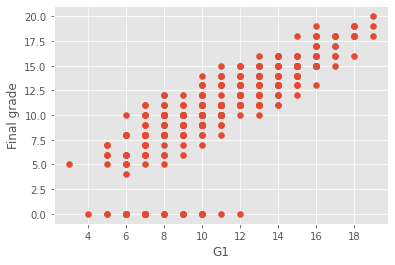

In [16]:
p='G1'
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final grade")
pyplot.show()